## Importing Libraries and Modules 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
from tensorflow import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random 
from keras.models import Sequential
from keras.layers import Dense
import imgaug as ia
import imgaug.augmenters as iaa

print(os.listdir("dataset"))


['test', 'train']


## Definition Of Variables & Lists

In [2]:
SIZE = 250

train_images = []
pross_train_images = []
train_labels = [] 
test_images = []
pross_test_images = []
test_labels = []

## Reading Images & Resizing them

In [3]:
for directory_path in glob.glob("dataset/train/*"):
    label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (SIZE, SIZE)) 
        train_images.append(img)
        train_labels.append(label)
        
train_images = np.array(train_images)

In [4]:
for directory_path in glob.glob("dataset/test/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (SIZE, SIZE))
        test_images.append(img)
        test_labels.append(fruit_label)
        
test_images = np.array(test_images)

## ِApply Median Filter

In [5]:
for i in range(0,len(train_images)):
    img = train_images[i,:,:]
    imgmedian = cv2.medianBlur(img, 3)
    pross_train_images.append(imgmedian)

In [6]:
for i in range(0,len(test_images)):
    img = test_images[i,:,:]
    imgmedian = cv2.medianBlur(img, 3)
    pross_test_images.append(imgmedian)

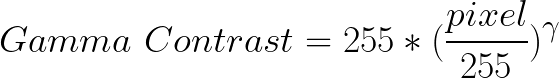


<span style="font-family: Comic Sans MS;font-size:400%;color: #159895; background: inherit;">
  Gamma Contrast    </span>
    <br />
<r />

 <span style="font-family:Comic Sans MS; font-size:1.5em; color: #1A5F7A;">
    <ul>
      <li>pixel is pixel Value.</li>      <li>gamma is evenly sampled from the range [XX, XX]</li>
.
        </li>
</ul>	
</span>

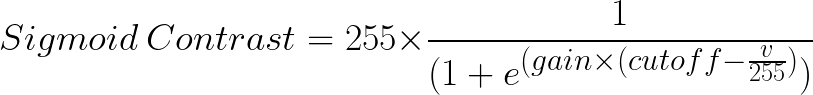!

<span style="font-family: Comic Sans MS;font-size: 350%;color: #159895; background: inherit;">
    Sigmoid Contrast</span>
    <br />
<br />

 <span style="font-family:Comic Sans MS; font-size:1.5em; color: #1A5F7A;">
    <ul>
  <li>V is a pixel value</li>
  <li>Gain is sampled uniformly from the interval [XX, XX]</li>
  <li>Cutoff is sampled consistently from the interval [XX, XX]</li>

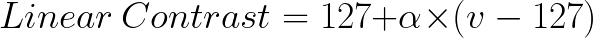

<span style="font-family: Comic Sans MS;font-size: 350%;color: #159895; background: inherit;">
    Linear Contrast</span>
    <br />
<br />

 <span style="font-family:Comic Sans MS; font-size:1.5em; color: #1A5F7A;">
    <ul>
  <li>V is a pixel value</li>
  <li>Alpha is sampled uniformly from the range [XX, XX]</li>

In [7]:
#Horizontal Flip
hflip= iaa.Fliplr(p=1.0)
#Vertical Flip
vflip= iaa.Flipud(p=1.0) 
#percent=(V,H)
crop1 = iaa.Crop(percent=(0, 0.25))
contrast=iaa.GammaContrast((0.5, 2.0))
contrast_sig = iaa.SigmoidContrast(gain=(5, 10), cutoff=(0.4, 0.6))
contrast_lin = iaa.LinearContrast((0.6, 0.4))

In [8]:
for i in range(0,len(train_images)):
    img = train_images[i,:,:]
    lable = train_labels[i]
    img_hf= hflip.augment_image(img)
    pross_train_images.append(img_hf)
    train_labels.append(lable)
    img_vf= vflip.augment_image(img)
    pross_train_images.append(img_vf)
    train_labels.append(lable)
    img_crop1 = crop1.augment_image(img)
    pross_train_images.append(img_crop1)
    train_labels.append(lable)
    img_contrast = contrast.augment_image(img)
    pross_train_images.append(img_contrast)
    train_labels.append(lable)
    img_sigmoid_contrast = contrast_sig.augment_image(img)
    pross_train_images.append(img_sigmoid_contrast)
    train_labels.append(lable)
    img_linear_contrast = contrast_lin.augment_image(img)
    pross_train_images.append(img_linear_contrast)
    train_labels.append(lable)

In [9]:
for i in range(0,len(test_images)):
    img = test_images[i,:,:]
    lable = test_labels[i]
    img_hf= hflip.augment_image(img)
    pross_test_images.append(img_hf)
    test_labels.append(lable)
    img_vf= vflip.augment_image(img)
    pross_test_images.append(img_vf)
    test_labels.append(lable)
    img_crop1 = crop1.augment_image(img)
    pross_test_images.append(img_crop1)
    test_labels.append(lable)
    img_contrast = contrast.augment_image(img)
    pross_test_images.append(img_contrast)
    test_labels.append(lable)
    img_sigmoid_contrast = contrast_sig.augment_image(img)
    pross_test_images.append(img_sigmoid_contrast)
    test_labels.append(lable)
    img_linear_contrast = contrast_lin.augment_image(img)
    pross_test_images.append(img_linear_contrast)
    test_labels.append(lable)

In [10]:
pross_train_images = np.array(pross_train_images)
pross_test_images = np.array(pross_test_images)

In [11]:
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [12]:
x_train, y_train, x_test, y_test = pross_train_images, train_labels_encoded, pross_test_images, test_labels_encoded

In [13]:
model = Sequential()  # Sequential is box we put in it our layers.
model.add(Conv2D(filters=64, kernel_size=5, strides=(1, 1), padding='same', input_shape=(SIZE, SIZE,3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"))
model.add(Conv2D(filters=32, kernel_size=5, strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))
model.add(Flatten())  # Flatten covert image matrix to vector.
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Compiling model
opt = keras.optimizers.Adam(learning_rate=0.0001)
callback = keras.callbacks.EarlyStopping(monitor='loss',patience=2)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics='accuracy')
model.fit(x_train, y_train, epochs=10, batch_size=40, callbacks=[callback])



Epoch 1/10


49/49 [==============================] - 215s 4s/step - loss: 2.1824 - accuracy: 0.7547
Epoch 2/10
49/49 [==============================] - 170s 3s/step - loss: 0.2902 - accuracy: 0.9032
Epoch 3/10
49/49 [==============================] - 152s 3s/step - loss: 0.1850 - accuracy: 0.9355
Epoch 4/10
49/49 [==============================] - 99s 2s/step - loss: 0.0927 - accuracy: 0.9647
Epoch 5/10
49/49 [==============================] - 126s 3s/step - loss: 0.0604 - accuracy: 0.9775
Epoch 6/10
49/49 [==============================] - 137s 3s/step - loss: 0.0750 - accuracy: 0.9744
Epoch 7/10
49/49 [==============================] - 139s 3s/step - loss: 0.0315 - accuracy: 0.9898
Epoch 8/10
49/49 [==============================] - 147s 3s/step - loss: 0.0213 - accuracy: 0.9949
Epoch 9/10
49/49 [==============================] - 143s 3s/step - loss: 0.0242 - accuracy: 0.9944
Epoch 10/10
49/49 [==============================] - 125s 3s/step - loss: 0.0145 - accuracy: 0.9954


In [14]:
# evaluate the model
scores = model.evaluate(x_test, y_test)
print(f"Test {model.metrics_names[1]}: { scores[1] * 100}")

16/16 [==============================] - 10s 571ms/step - loss: 0.3235 - accuracy: 0.9107
Test accuracy: 91.07142686843872


In [15]:
y_pred = model.predict(x_test)
y_pred = np.round(y_pred).reshape((504,)).astype(int)

16/16 [==============================] - 10s 579ms/step


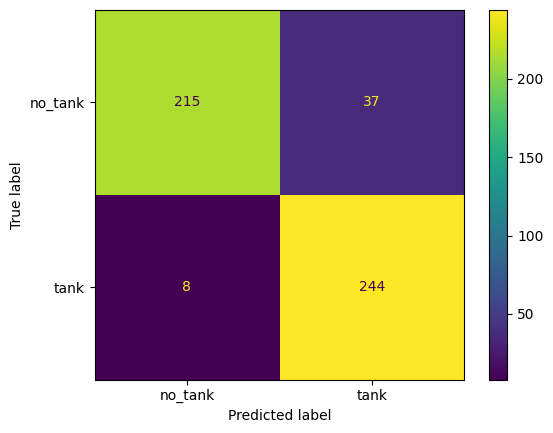

In [16]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le.classes_)
disp.plot()
plt.show()

In [17]:
model.save("tankdetector.h5")

C:\Users\elfateh\.conda\envs\CVlast\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
